# Random Walk on Networks #

## 1. Random walk on Erdös-Rényi networks ##

### Qa: Create an undirected random network with 1000 nodes, and the probability p for drawing an edge between any pair of nodes equal to 0.01. ###

In [9]:
install.packages("pracma", type="binary")


The downloaded binary packages are in
	/var/folders/7q/9tm7mqz16p764351t4l5mybr0000gn/T//RtmpFCVvrn/downloaded_packages


In [1]:
library(igraph)



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
library('Matrix')
library('pracma')


Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



In [3]:
set.seed(0)
p =0.01
g1 = erdos.renyi.game(1000, p, directed=F)
# g1 = random.graph.game(10, p)
# plot(g1,vertex.size=2, vertex.label.cex=0.7)

In [4]:
is.connected(g1)

[1] TRUE

### Qb: Measure the average distance and the standard deviation ###

In [5]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [6]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
#         fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [7]:
random_walk_record = function (num_nodes, num_steps, g1, transition_matrix, sample){
    avg_distance = numeric()
    standard_deviation = numeric()
    deg_random_walk_end = numeric()
    for (j in 1:num_steps){
        distance_vec = numeric()
        for (i in 1:num_nodes) {
            start = i
            end = random_walk(g1, j, start, transition_matrix)
            distance = shortest.paths(g1, start, end)
            if (distance == Inf) {
                distance = 0
            }
            distance_vec = c(distance_vec, distance)

            if(j == num_steps){
                deg_random_walk_end = c(deg_random_walk_end, degree(g1, v = end))
            }
        }
        avg_distance = c(avg_distance, mean(distance_vec))
        standard_deviation = c(standard_deviation, sqrt(mean((distance_vec - mean(distance_vec))**2)))    
        }
        plot(avg_distance, typ='l', main = paste("Average Distance vs. t -", num_nodes, "nodes"), xlab = "Steps", ylab = "Average Distance")
        plot(standard_deviation, typ='l', main = paste("Average Standard Deviation vs. t - ", num_nodes, "nodes"), xlab = "Steps", ylab = "Average Standard Deviation")
        return(deg_random_walk_end)
}

In [19]:
random_walk_record_sample = function (num_nodes_all, num_steps, g1, transition_matrix, sample_num){
    list_nodes = seq(1, num_nodes_all, by = 1)
    num_nodes = sample(list_nodes, sample_num)
#     print(num_nodes)
    avg_distance = numeric()
    standard_deviation = numeric()
    deg_random_walk_end = numeric()
    for (j in 1:num_steps){
        distance_vec = numeric()
        for (i in num_nodes) {
            start = i
            end = random_walk(g1, j, start, transition_matrix)
            distance = shortest.paths(g1, start, end)
            if (distance == Inf) {
                distance = 0
            }
            distance_vec = c(distance_vec, distance)

            if(j == num_steps){
                deg_random_walk_end = c(deg_random_walk_end, degree(g1, v = end))
            }
        }
        avg_distance = c(avg_distance, mean(distance_vec))
        standard_deviation = c(standard_deviation, sqrt(mean((distance_vec - mean(distance_vec))**2))) 
        }
        plot(avg_distance, typ='l', main = paste("Average Distance vs. t -", num_nodes_all, "nodes"), xlab = "Steps", ylab = "Average Distance")
        plot(standard_deviation, typ='l', main = paste("Average Standard Deviation vs. t - ", num_nodes_all, "nodes"), xlab = "Steps", ylab = "Average Standard Deviation")
        return(deg_random_walk_end)
}

In [9]:
find_gcc = function (g){
    if(is.connected(g) == TRUE){
        return (g)
    }
    else{
        g.components  = clusters(g)
        print(g.components$csize)
        
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
        return (g.giant)
    }
}

In [10]:
transition_matrix_g1 = create_transition_matrix(g1)

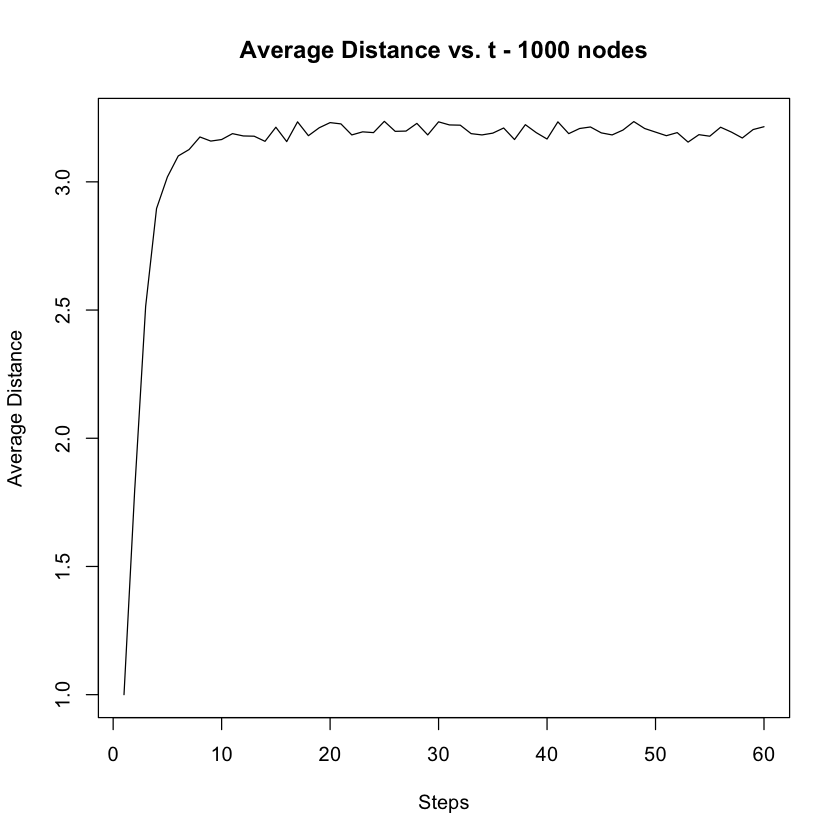

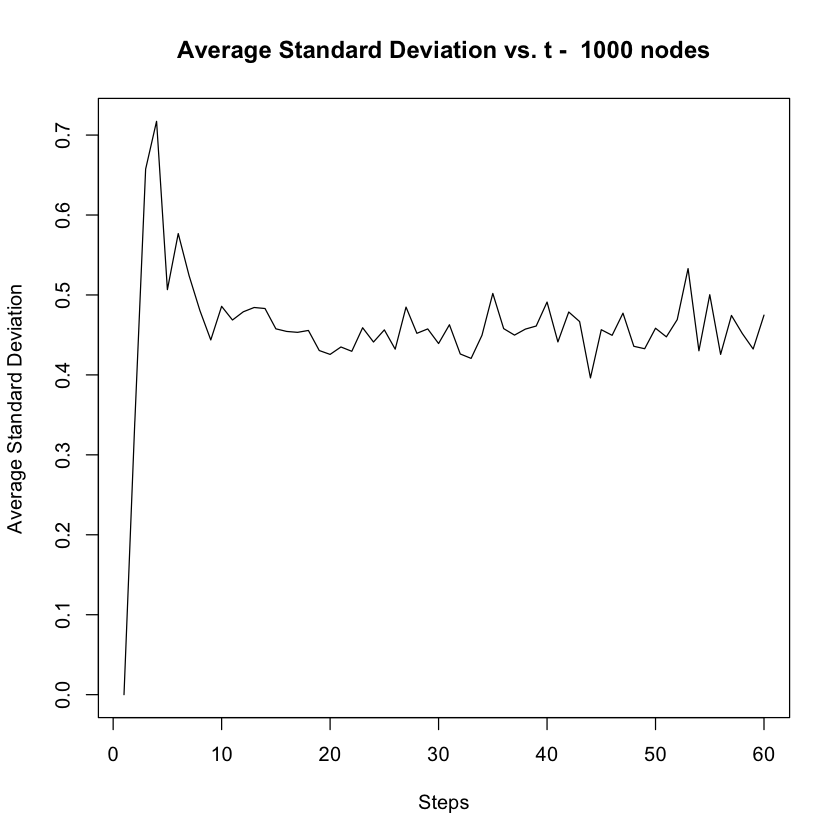

In [14]:
deg_random_walk_end = random_walk_record(1000, 60, g1,transition_matrix_g1)

### Qc: compare the degree distribution of graph ###

Warning message in title(...):
“conversion failure on 'Degree distribution of the Erdös-Rényi network' in 'mbcsToSbcs': dot substituted for <cc>”Warning message in title(...):
“conversion failure on 'Degree distribution of the Erdös-Rényi network' in 'mbcsToSbcs': dot substituted for <88>”Warning message in title(...):
“conversion failure on 'Degree distribution of the Erdös-Rényi network' in 'mbcsToSbcs': dot substituted for <cc>”Warning message in title(...):
“conversion failure on 'Degree distribution of the Erdös-Rényi network' in 'mbcsToSbcs': dot substituted for <81>”

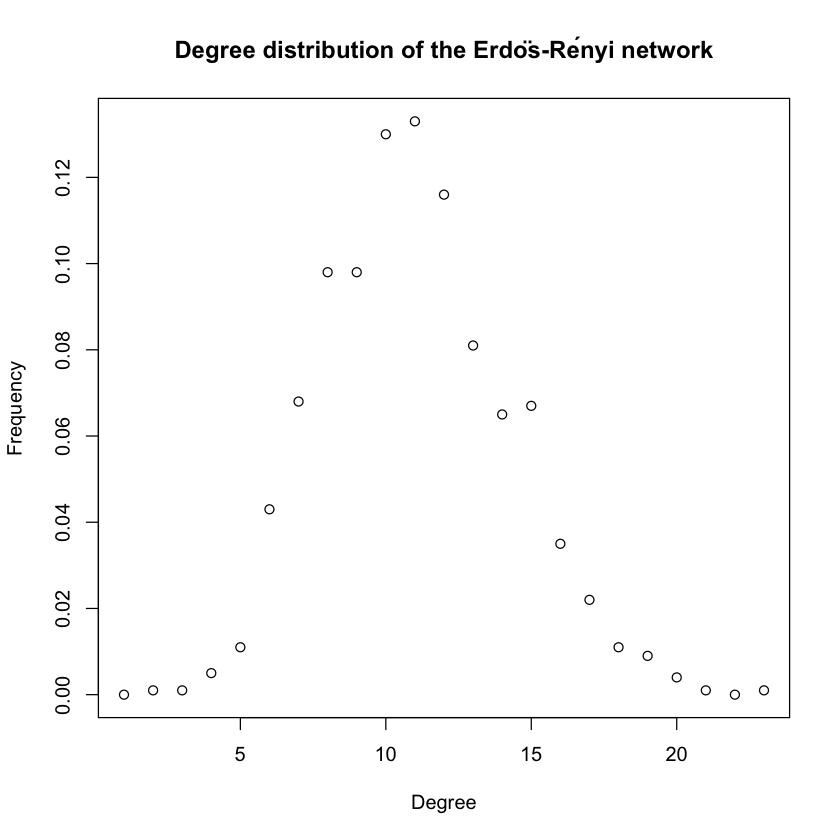

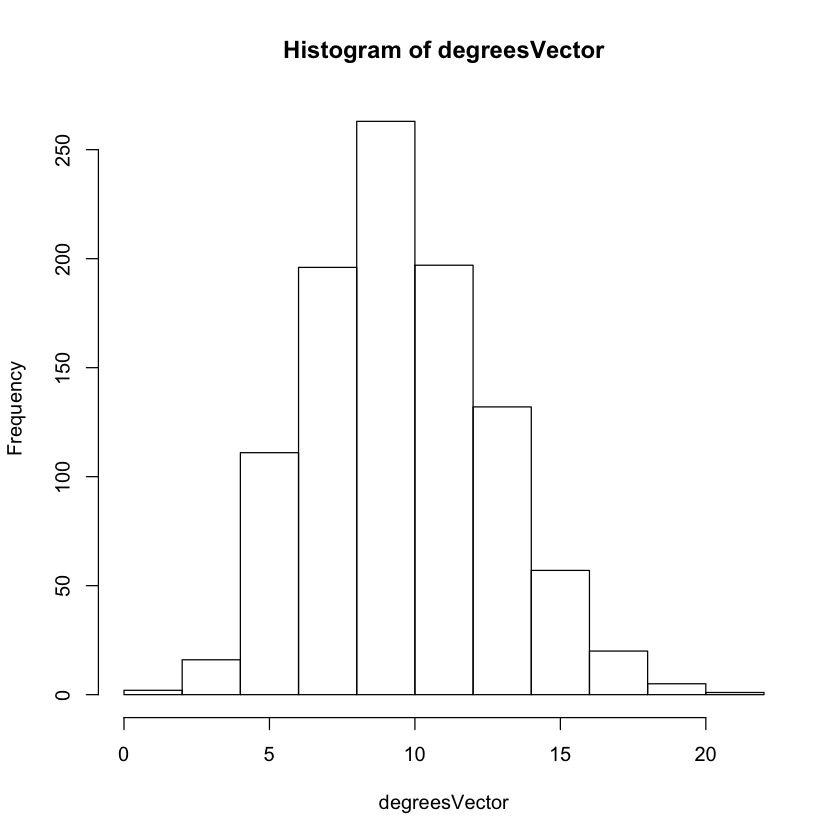

In [15]:
plot(degree.distribution(g1),main="Degree distribution of the Erdös-Rényi network",xlab="Degree",ylab="Frequency")
degreesVector = degree(g1)
hist(degreesVector)

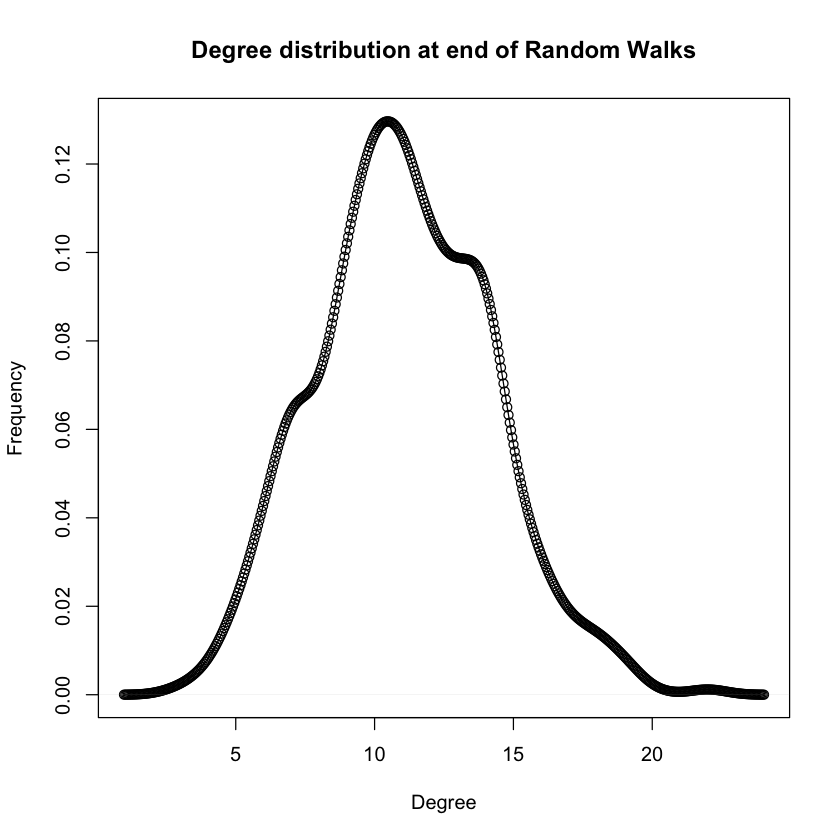

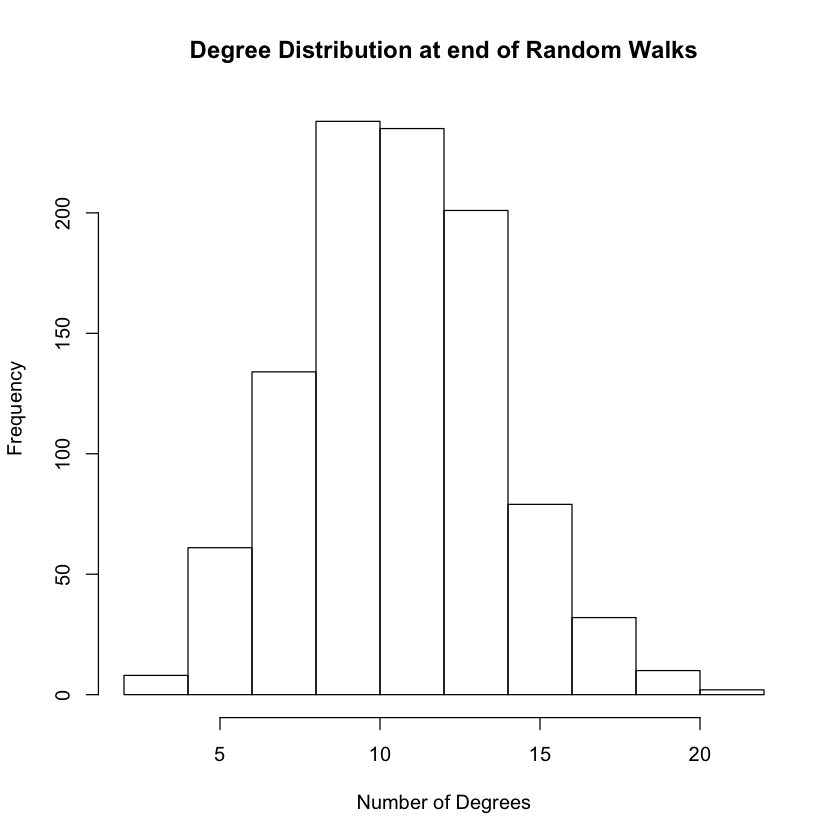

In [46]:
d = density(deg_random_walk_end)
plot(d,main="Degree distribution at end of Random Walks",type = 'o', xlab="Degree",ylab="Frequency")
hist(x = deg_random_walk_end, main = "Degree Distribution at end of Random Walks", xlab = "Number of Degrees") 

### Qd: Repeat (b) for undirected random networks with 100 and 10000 nodes.###

In [11]:
g2 = erdos.renyi.game(100, p, directed=F)
g3 = erdos.renyi.game(10000, p, directed=F)

transition_matrix_g2 = create_transition_matrix(g2)
transition_matrix_g3 = create_transition_matrix(g3)


In [12]:
diameter(g1)
diameter(g2)
diameter(g3)

[1] 6

[1] 13

[1] 3

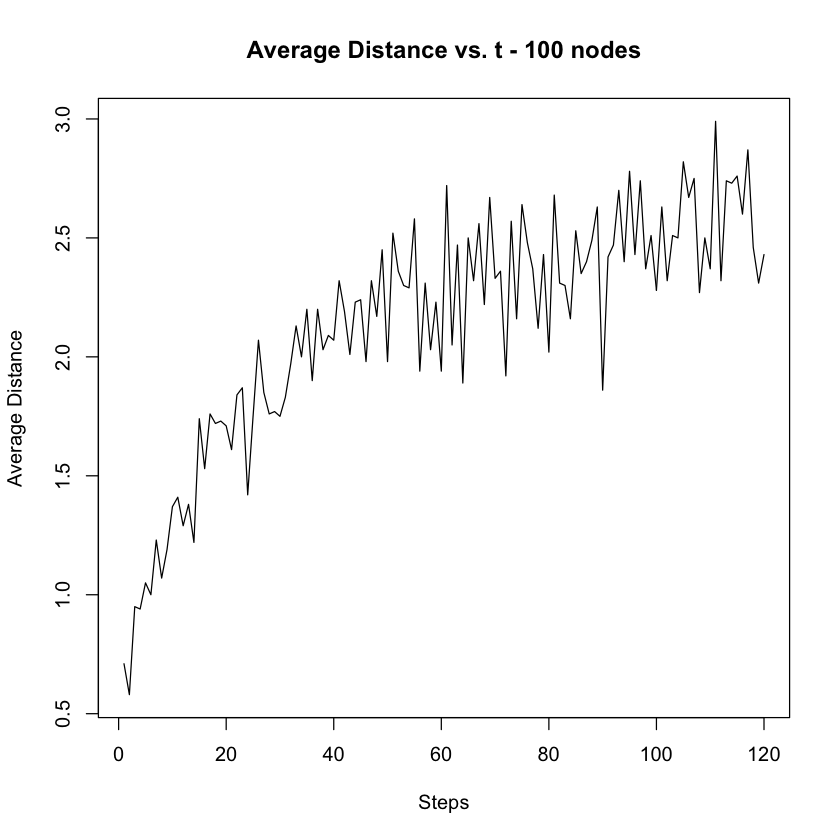

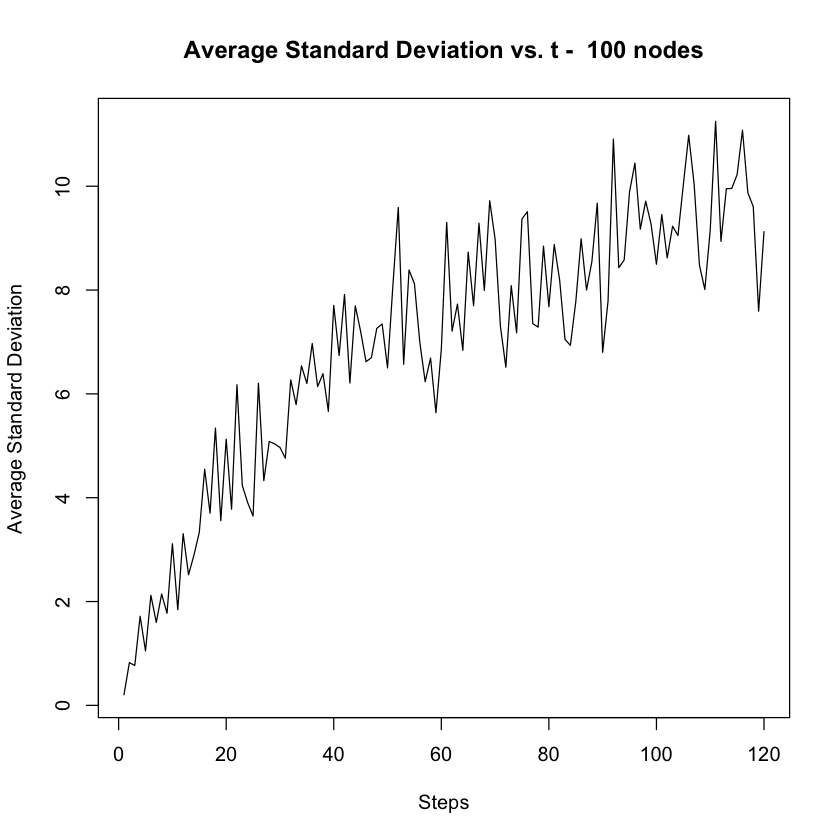

In [17]:
deg_random_walk_end2 = random_walk_record(100, 120, g2, transition_matrix_g2)


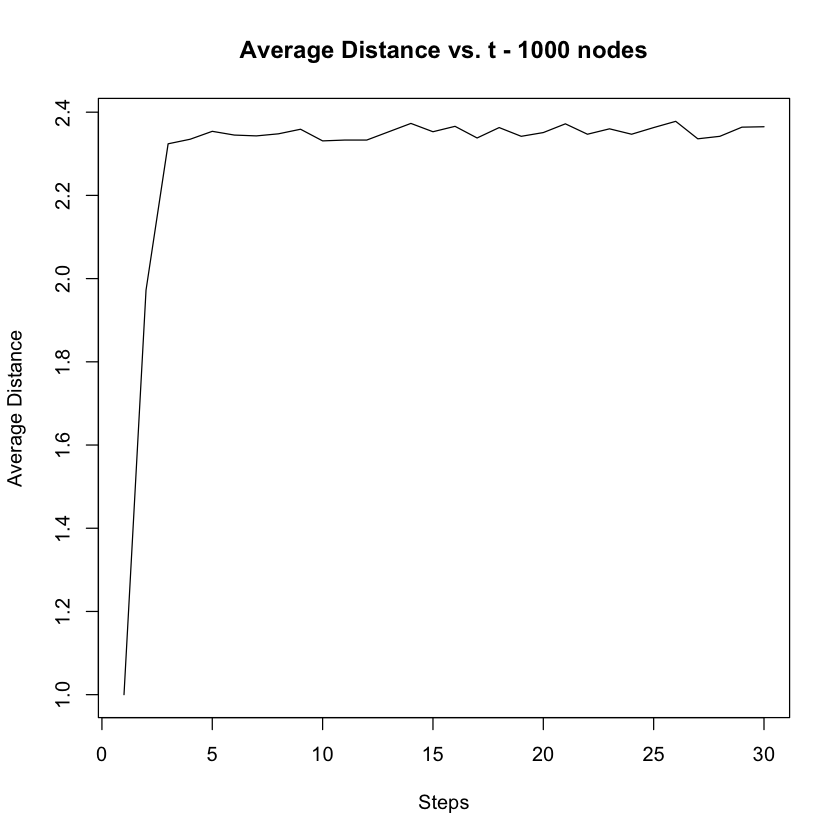

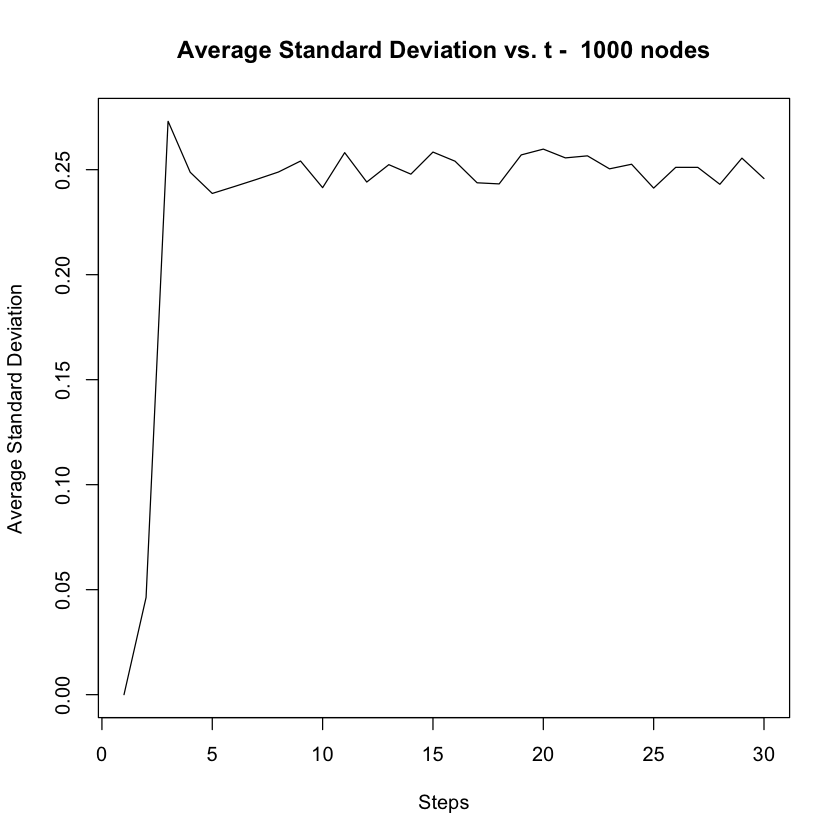

In [18]:
deg_random_walk_end3 = random_walk_record_sample(10000, 30, g3, transition_matrix_g3, 1000)

## 2. Random walk on networks with fat-tailed degree distribution ##

### Qa: Generate an undirected preferential attachment network  ###

In [20]:
b1 = barabasi.game(1000, 1, directed = F)

In [21]:
transition_matrix_b1 = create_transition_matrix(b1)

### Qb: Let a random walker start from a randomly selected node  ###

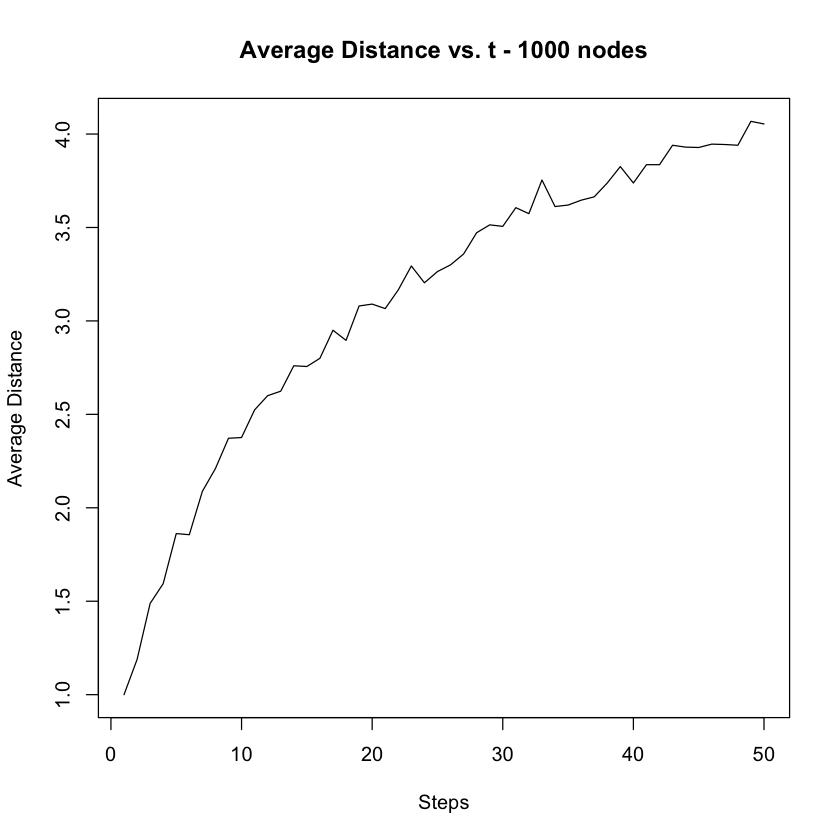

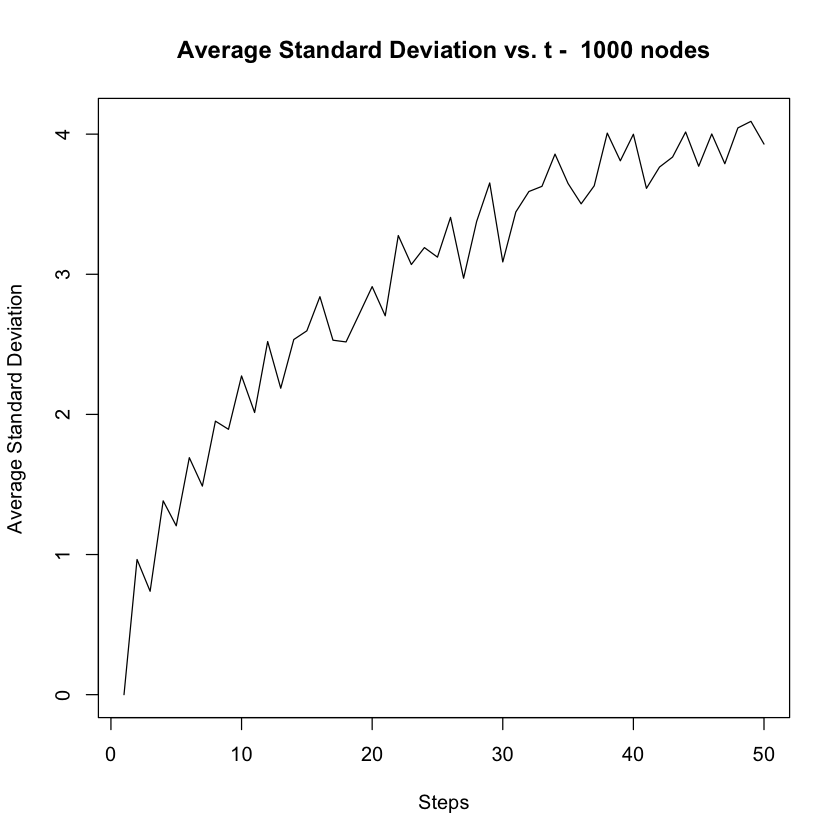

In [22]:
deg_random_walk_end_b1 = random_walk_record(1000, 50, b1, transition_matrix_b1)

### Qc: compare the degree distribution ###

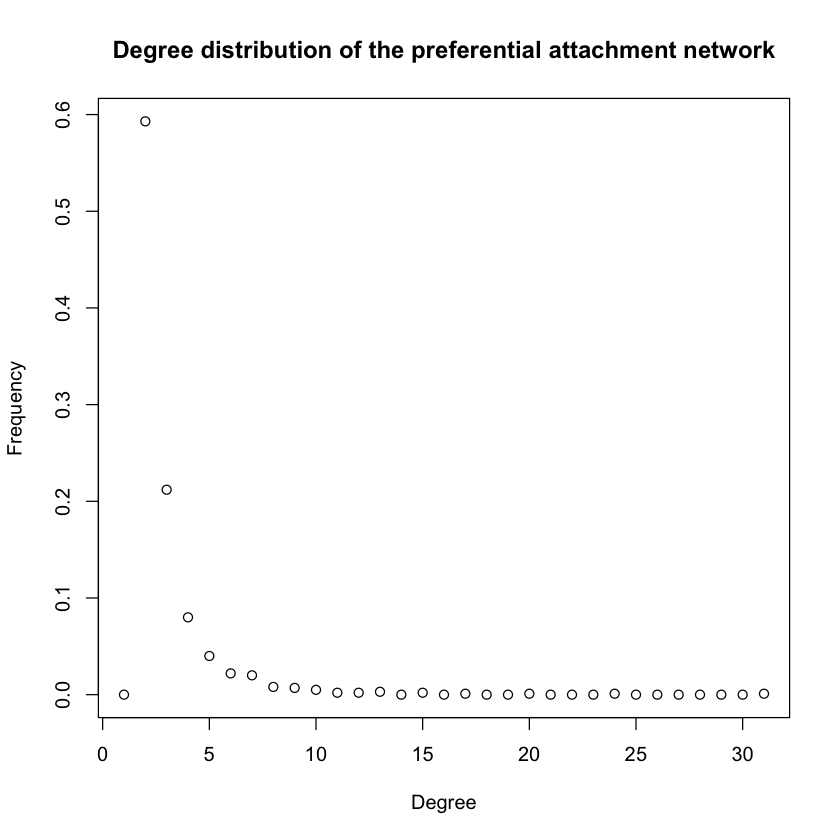

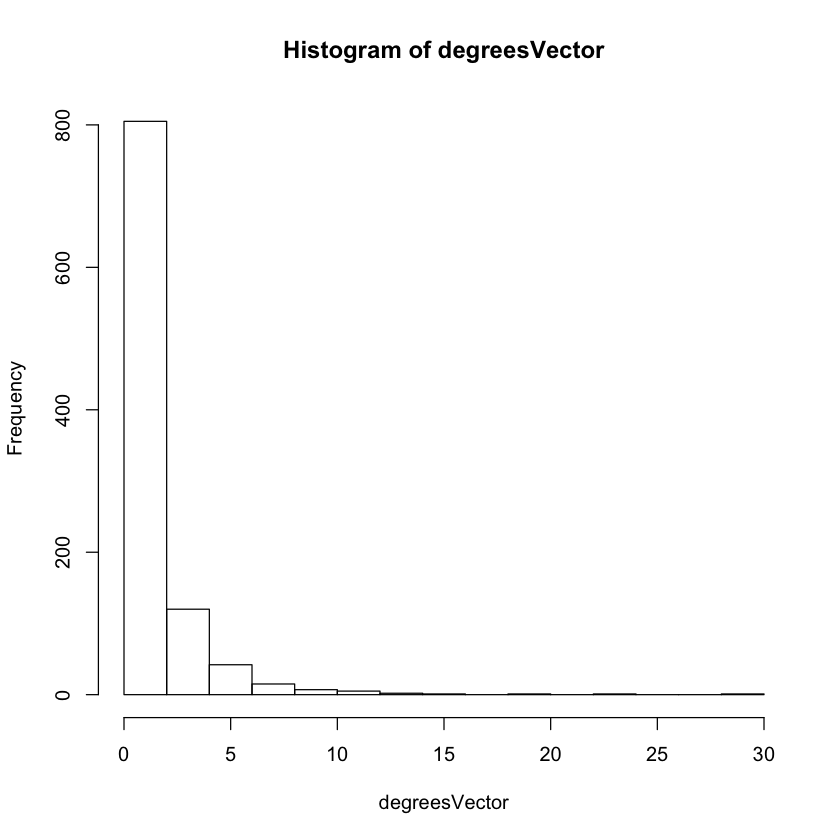

In [23]:
plot(degree.distribution(b1),main="Degree distribution of the preferential attachment network",xlab="Degree",ylab="Frequency")
degreesVector = degree(b1)
hist(degreesVector)

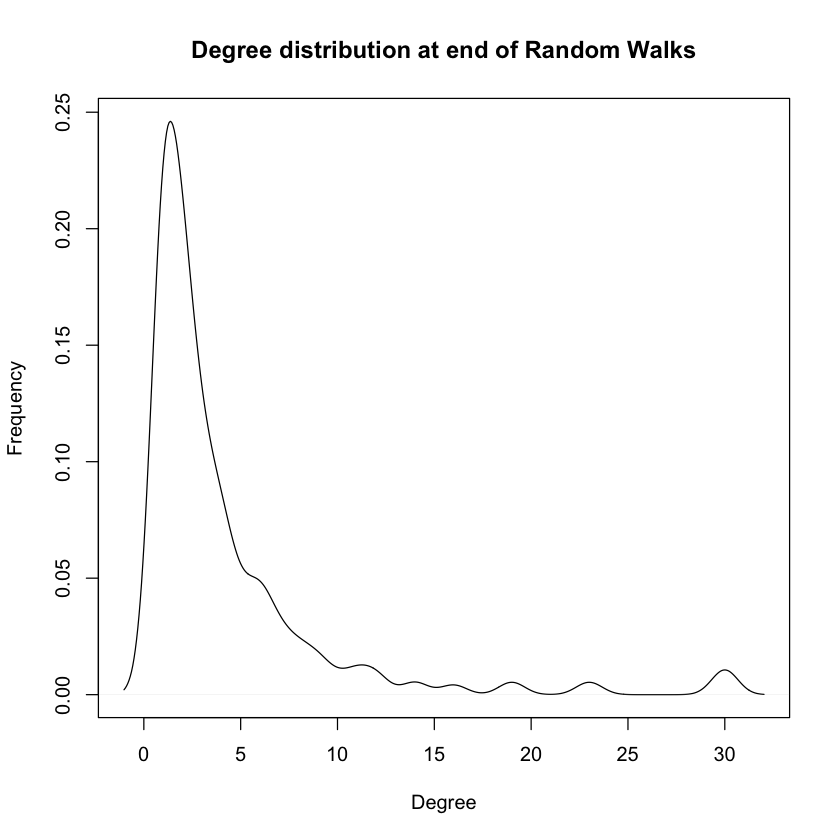

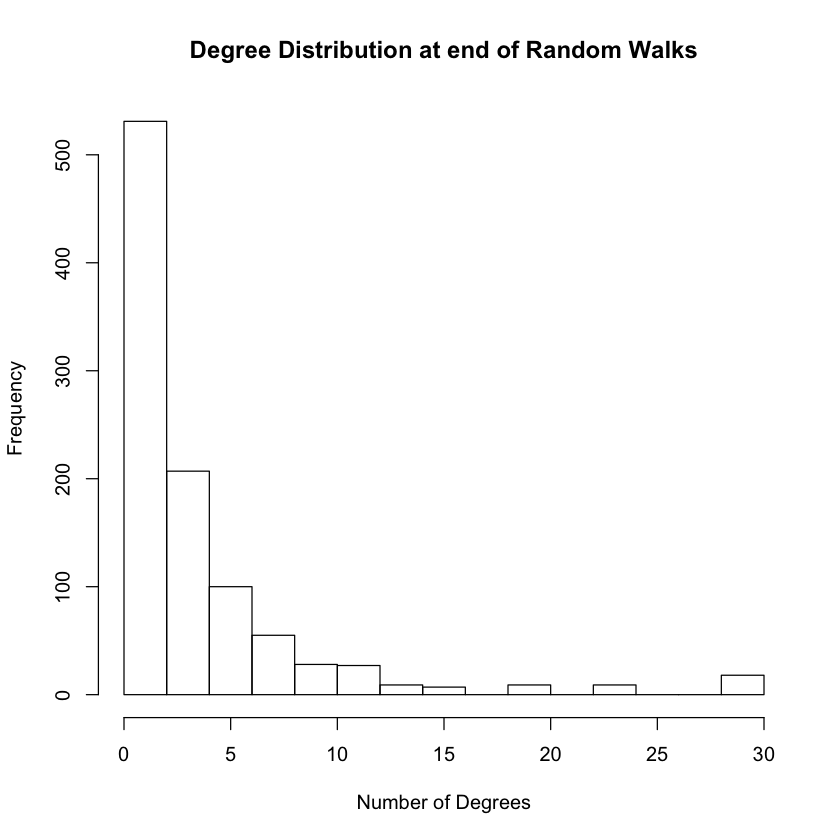

In [24]:
d = density(deg_random_walk_end_b1)
plot(d,main="Degree distribution at end of Random Walks",xlab="Degree",ylab="Frequency")
hist(x = deg_random_walk_end_b1, main = "Degree Distribution at end of Random Walks", xlab = "Number of Degrees") 

### Qd: Repeat (b) for preferential attachment networks with 100 and 10000 nodes ###

In [25]:
b2 = barabasi.game(100, 1, directed = F)
b3 = barabasi.game(10000, 1, directed = F)

In [26]:
diameter(b1)
diameter(b2)
diameter(b3)

[1] 20

[1] 11

[1] 33

In [27]:
transition_matrix_b2 = create_transition_matrix(b2)
transition_matrix_b3 = create_transition_matrix(b3)

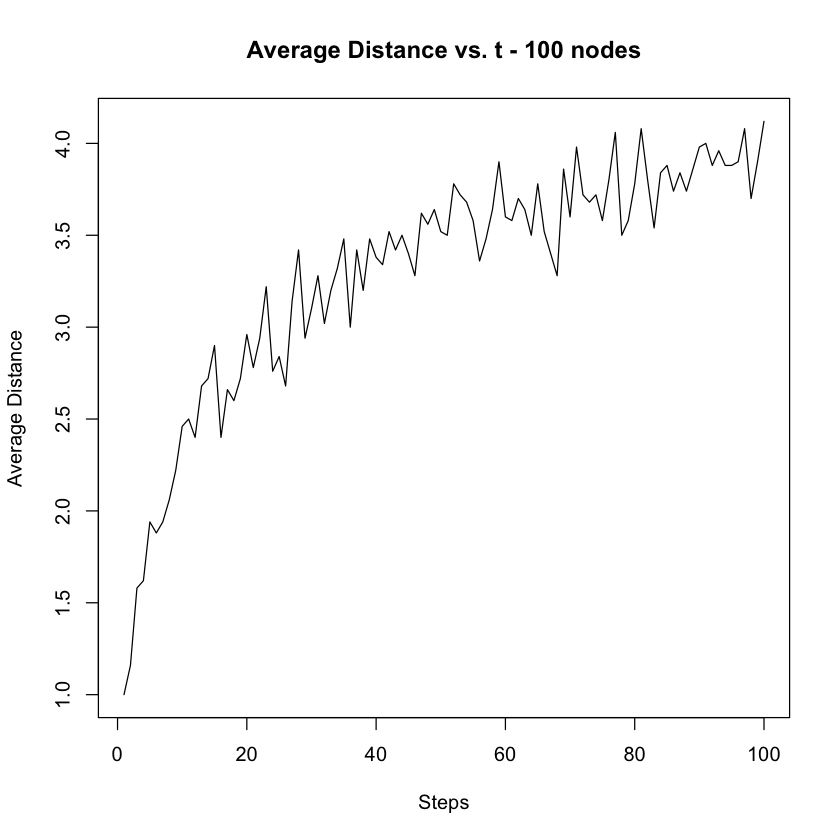

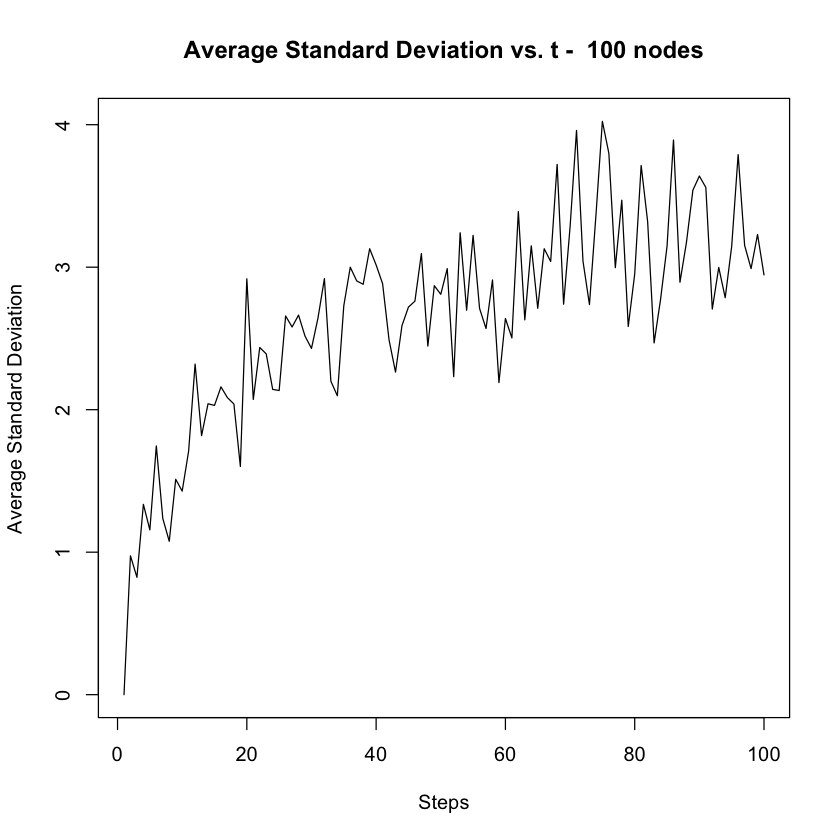

In [28]:
deg_random_walk_end_b2 = random_walk_record(100, 100, b2, transition_matrix_b2)


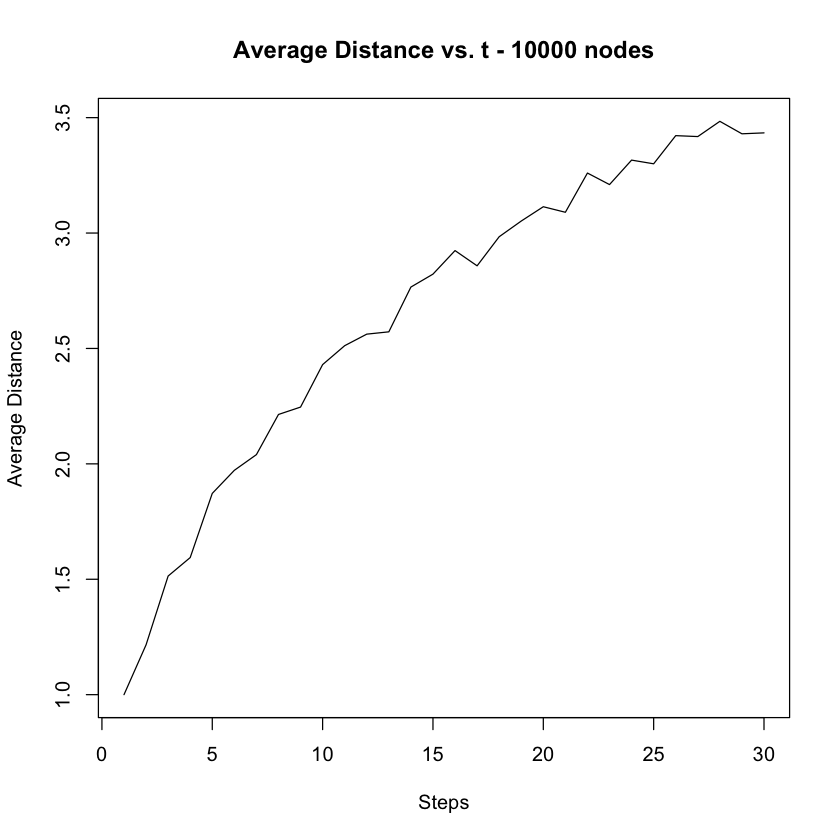

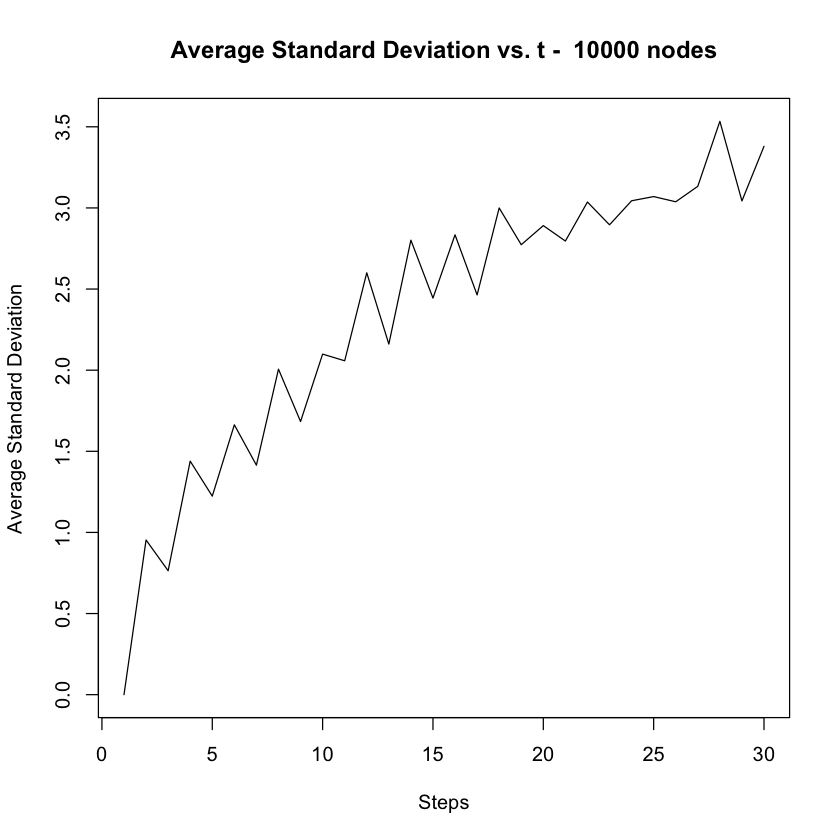

In [29]:
deg_random_walk_end_b3 = random_walk_record_sample(10000, 30, b3, transition_matrix_b3, 1000)

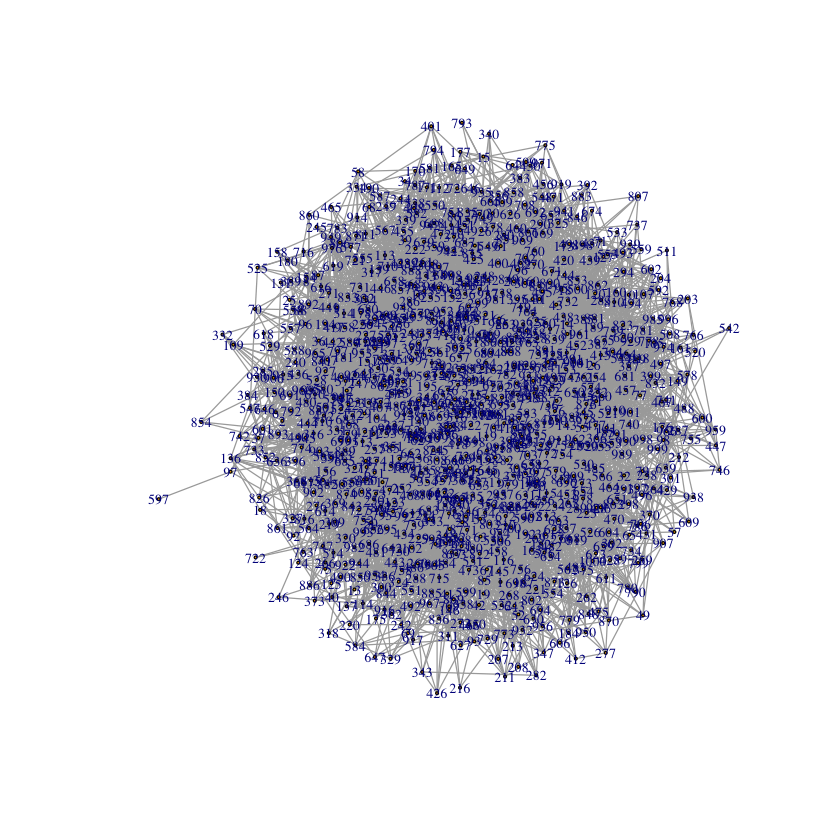

In [30]:
plot(g1,vertex.size=1, vertex.label.cex=0.7)

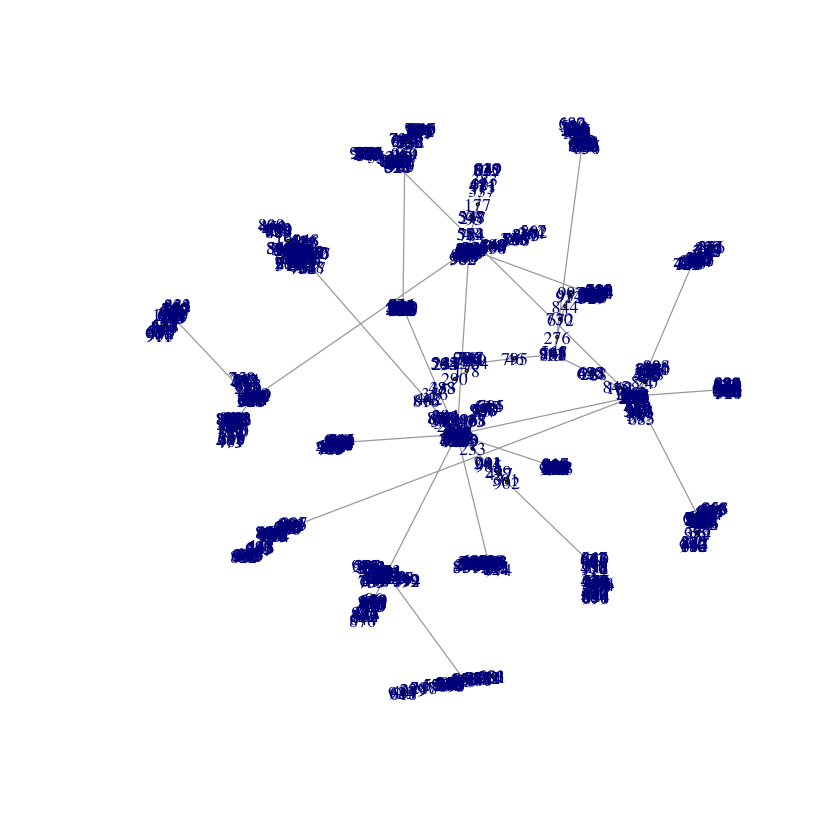

In [33]:
plot(b1,vertex.size=1, vertex.label.cex=0.9)